In [52]:
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
# it's a library that we work with plotly
import plotly.offline as py 
import plotly.express as px
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [53]:
data=pd.read_csv("german_credit_data.csv",index_col=0)


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [55]:
print(f"Number of Unique Values in Each Features:\n{data.nunique()}")

Number of Unique Values in Each Features:
Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


In [56]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [57]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [58]:
data['Saving accounts'].value_counts()

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [59]:
data['Checking account'].value_counts()

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64

In [60]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


In [61]:
data.describe(include='object').T

,count,unique,top,freq
Sex,1000,2,male,690
Housing,1000,3,own,713
Saving accounts,817,4,little,603
Checking account,606,3,little,274
Purpose,1000,8,car,337
Risk,1000,2,good,700


In [62]:
df=data.copy()

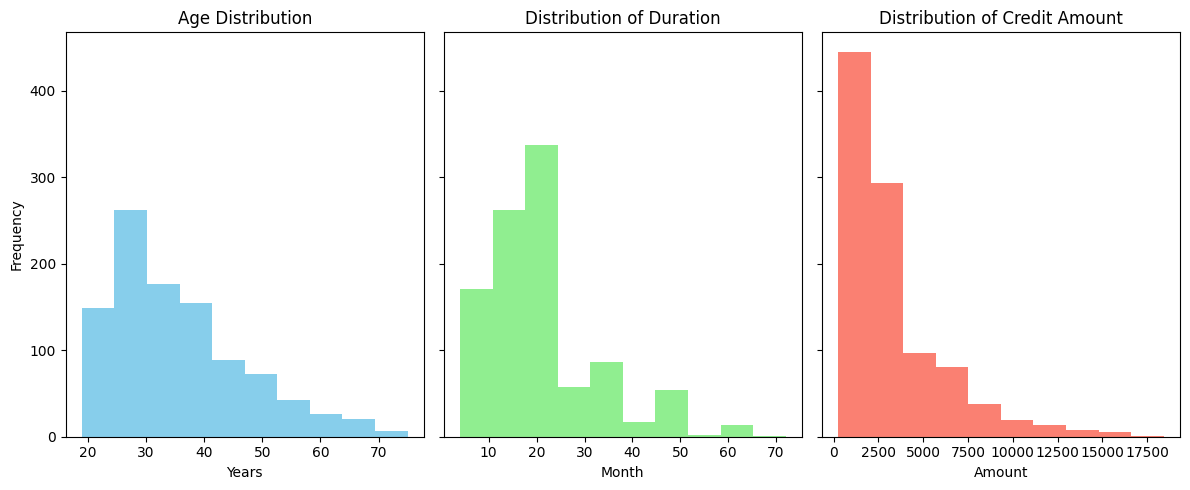

In [63]:
fig, axis = plt.subplots(1,3, figsize = (12,5), sharey=True)
df['Age'].plot(kind='hist', ax=axis[0], title='Age Distribution', xlabel='Years', color='skyblue')
df['Duration'].plot(kind='hist', ax=axis[1], title='Distribution of Duration', bins=10, xlabel='Month', color='lightgreen')
df['Credit amount'].plot(kind='hist', ax=axis[2], title='Distribution of Credit Amount', xlabel='Amount', color='salmon')

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Distribution of Age_cat'}, xlabel='Age_cat'>

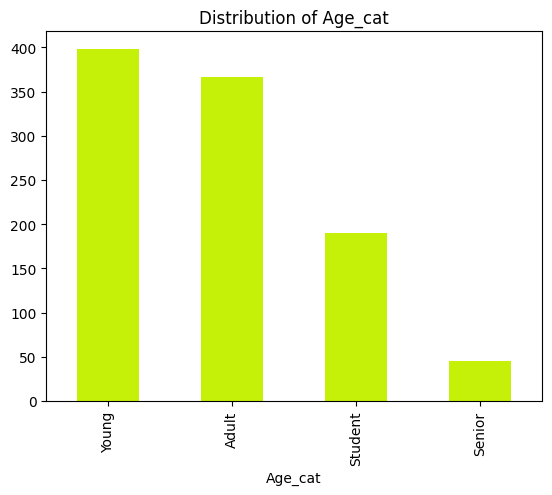

In [64]:
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df["Age_cat"] = pd.cut(df.Age, interval, labels=cats)
# lets create bar plot of `Age_cat`
df['Age_cat'].value_counts().plot(kind='bar', title='Distribution of Age_cat', color='#c5f007')

In [65]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Senior
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Student
2,49,male,1,own,little,NaN,2096,12,education,good,Adult
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Adult
4,53,male,2,free,little,little,4870,24,car,bad,Adult


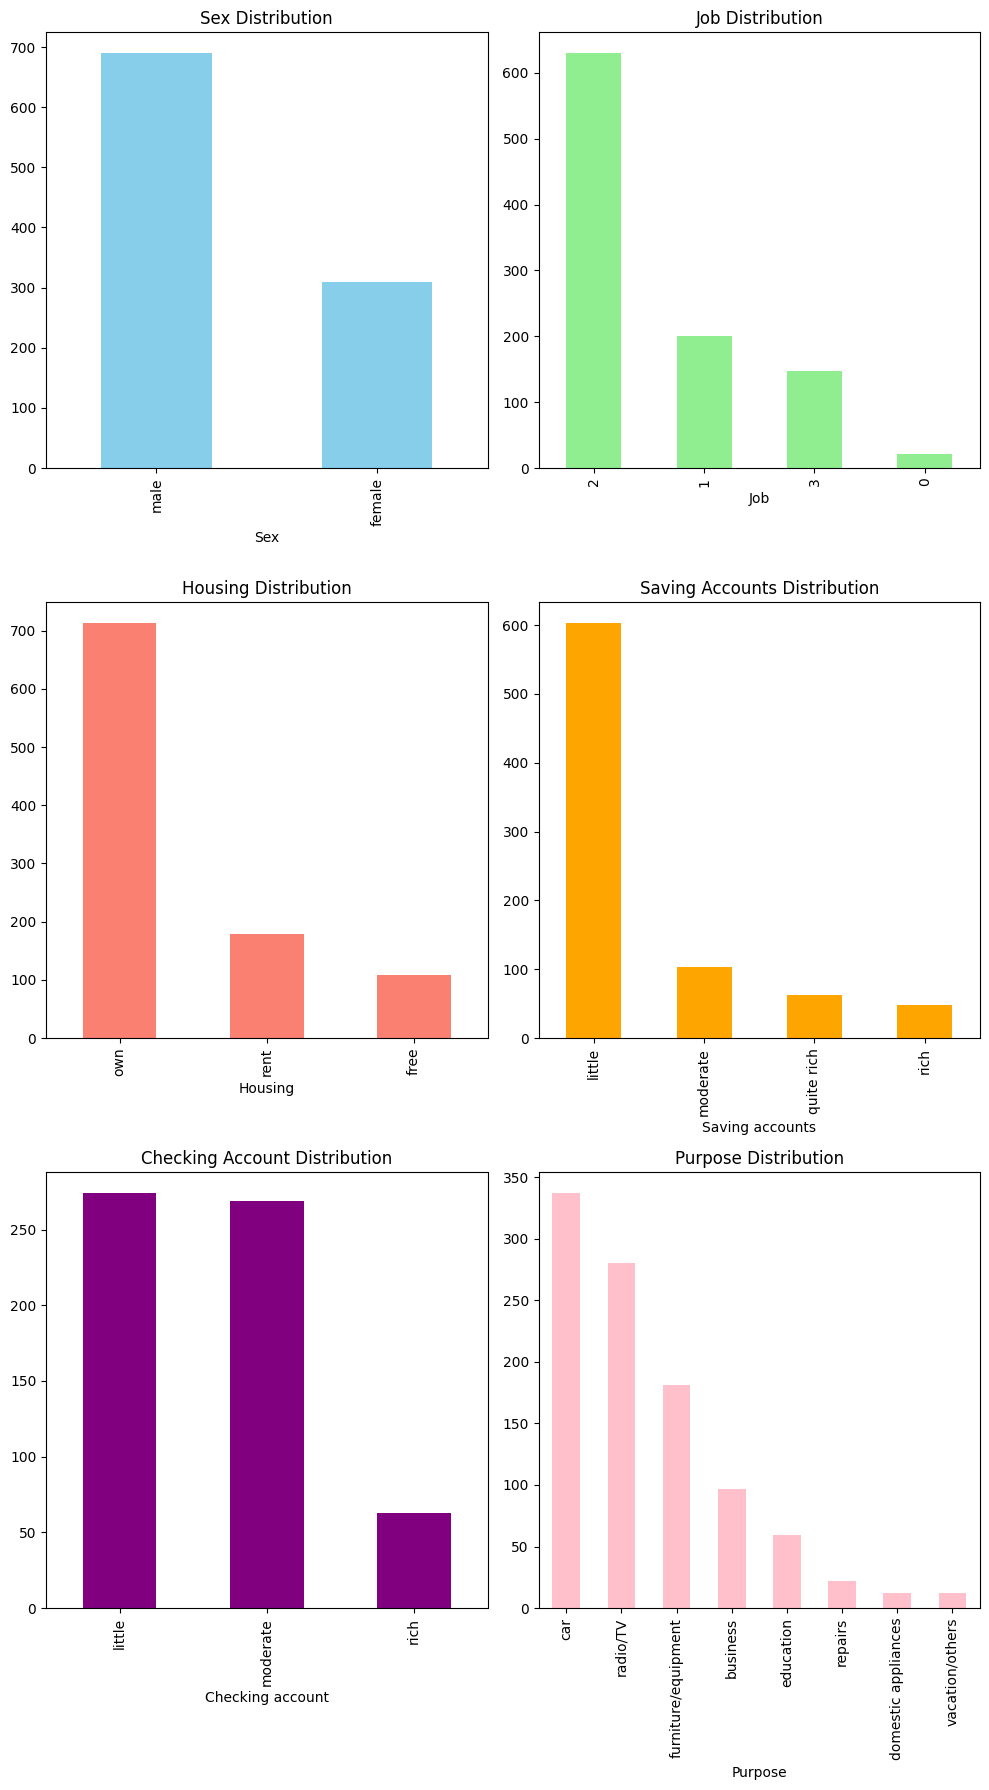

In [66]:
# Create subplots
fig, axis = plt.subplots(3, 2, figsize=(10, 18))

# Plot each categorical variable
df['Sex'].value_counts().plot(kind='bar', ax=axis[0, 0], color='skyblue', title='Sex Distribution')
df['Job'].value_counts().plot(kind='bar', ax=axis[0, 1], color='lightgreen', title='Job Distribution')
df['Housing'].value_counts().plot(kind='bar', ax=axis[1, 0], color='salmon', title='Housing Distribution')
df['Saving accounts'].value_counts().plot(kind='bar', ax=axis[1, 1], color='orange', title='Saving Accounts Distribution')
df['Checking account'].value_counts().plot(kind='bar', ax=axis[2, 0], color='purple', title='Checking Account Distribution')
df['Purpose'].value_counts().plot(kind='bar', ax=axis[2, 1], color='pink', title='Purpose Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

In [67]:
# Count the occurrences of 'good' and 'bad' in the 'Risk' column

good_counts = data['Risk'].value_counts()['good']
bad_counts = data['Risk'].value_counts()['bad']

# Create the traces for the bar chart
trace0 = go.Bar(x=['good'], y=[good_counts], name='Good credit')
trace1 = go.Bar(x=['bad'], y=[bad_counts], name='Bad credit')

# Create the layout for the plot
layout = go.Layout(
    title='Target variable distribution',
    xaxis=dict(title='Risk Variable'),
    yaxis=dict(title='Count')
)

# Add traces to data list
data = [trace0, trace1]

# Create the figure
fig = go.Figure(data=data, layout=layout)
# Plot the figure
py.iplot(fig, filename='grouped-bar')

In [68]:
trace0 = go.Bar(
    x = df[df["Risk"]== 'good']["Housing"].value_counts().index.values,
    y = df[df["Risk"]== 'good']["Housing"].value_counts().values,
    name='Good credit'
)

trace1 = go.Bar(
    x = df[df["Risk"]== 'bad']["Housing"].value_counts().index.values,
    y = df[df["Risk"]== 'bad']["Housing"].value_counts().values,
    name="Bad Credit"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Housing Distribuition'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

In [69]:
trace0 = go.Bar(
    x = df[df["Risk"]== 'good']["Sex"].value_counts().index.values,
    y = df[df["Risk"]== 'good']["Sex"].value_counts().values,
    name='Good credit'
)

trace1 = go.Bar(
    x = df[df["Risk"]== 'bad']["Sex"].value_counts().index.values,
    y = df[df["Risk"]== 'bad']["Sex"].value_counts().values,
    name="Bad Credit"
)

trace2 = go.Box(
    x = df[df["Risk"]== 'good']["Sex"],
    y = df[df["Risk"]== 'good']["Credit amount"],
    name=trace0.name
)

trace3 = go.Box(
    x = df[df["Risk"]== 'bad']["Sex"],
    y = df[df["Risk"]== 'bad']["Credit amount"],
    name=trace1.name
)

data = [trace0, trace1, trace2,trace3]


fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Sex Count', 'Credit Amount by Sex'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Sex Distribuition', boxmode='group')
py.iplot(fig, filename='sex-subplot')

c:\Python312\Lib\site-packages\plotly\tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [70]:
trace0 = go.Box(
    x=df["Job"],
    y=df["Credit amount"],
    name='Good credit'
)

trace1 = go.Box(
    x=df['Job'],
    y=df['Credit amount'],
    name='Bad credit'
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount distribuition by Job'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

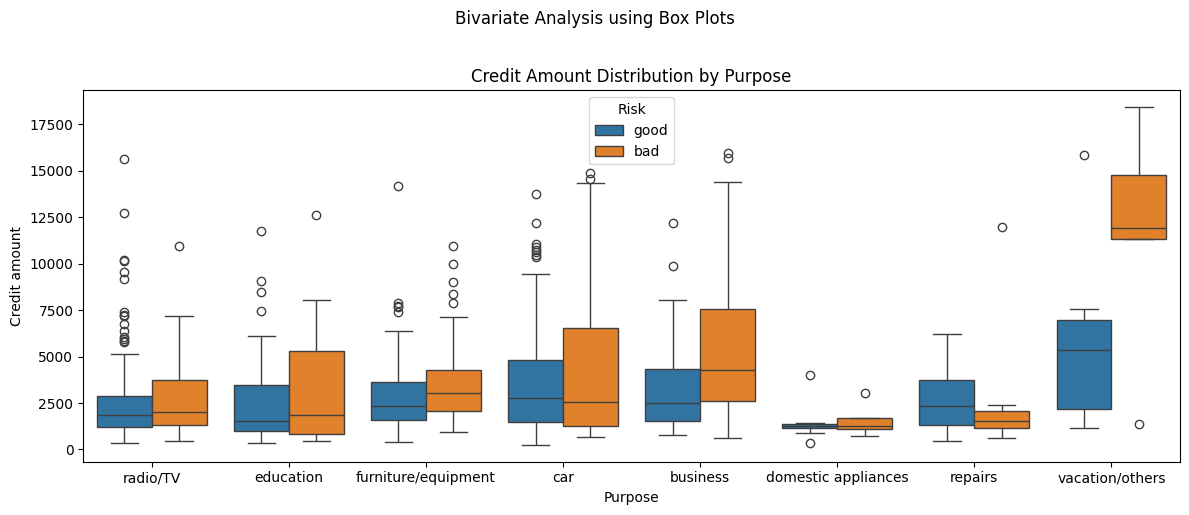

In [71]:
plt.figure(figsize=(12, 5))

# Create a box plot
sns.boxplot(x='Purpose', y='Credit amount', data=df, hue='Risk')

# Set title and adjust layout
plt.title('Credit Amount Distribution by Purpose')
plt.suptitle('Bivariate Analysis using Box Plots', y=1.02)
plt.tight_layout()
plt.show()

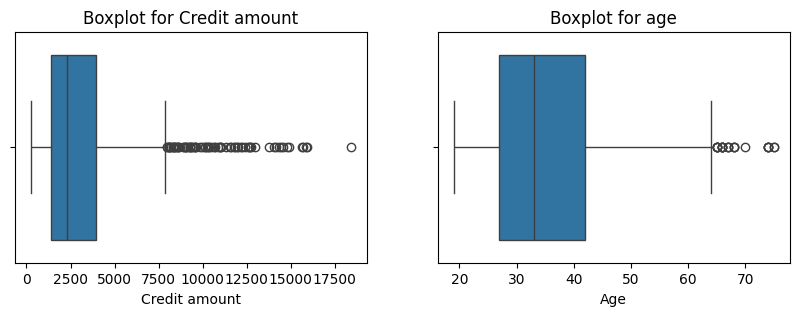

In [72]:
plt.figure(figsize = (10,3))

plt.subplot(121)
sns.boxplot(x = df['Credit amount'])
plt.title('Boxplot for Credit amount')

plt.subplot(122)
sns.boxplot(x = df['Age'])
plt.title('Boxplot for age')

plt.show()

In [73]:
import plotly.figure_factory as ff



# Add histogram data
x1 = np.log(df['Credit amount']) 
x2 = np.log(df["Credit amount"])

# Group data together
hist_data = [x1, x2]

group_labels = ['Good Credit', 'Bad Credit']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

# Plot!
py.iplot(fig, filename='Distplot with Multiple Datasets')

In [74]:
print(pd.crosstab(df["Checking account"],df.Sex))

Sex               female  male
Checking account              
little                88   186
moderate              86   183
rich                  20    43


In [75]:
custom_palette = sns.color_palette("Set2", len(df.columns))

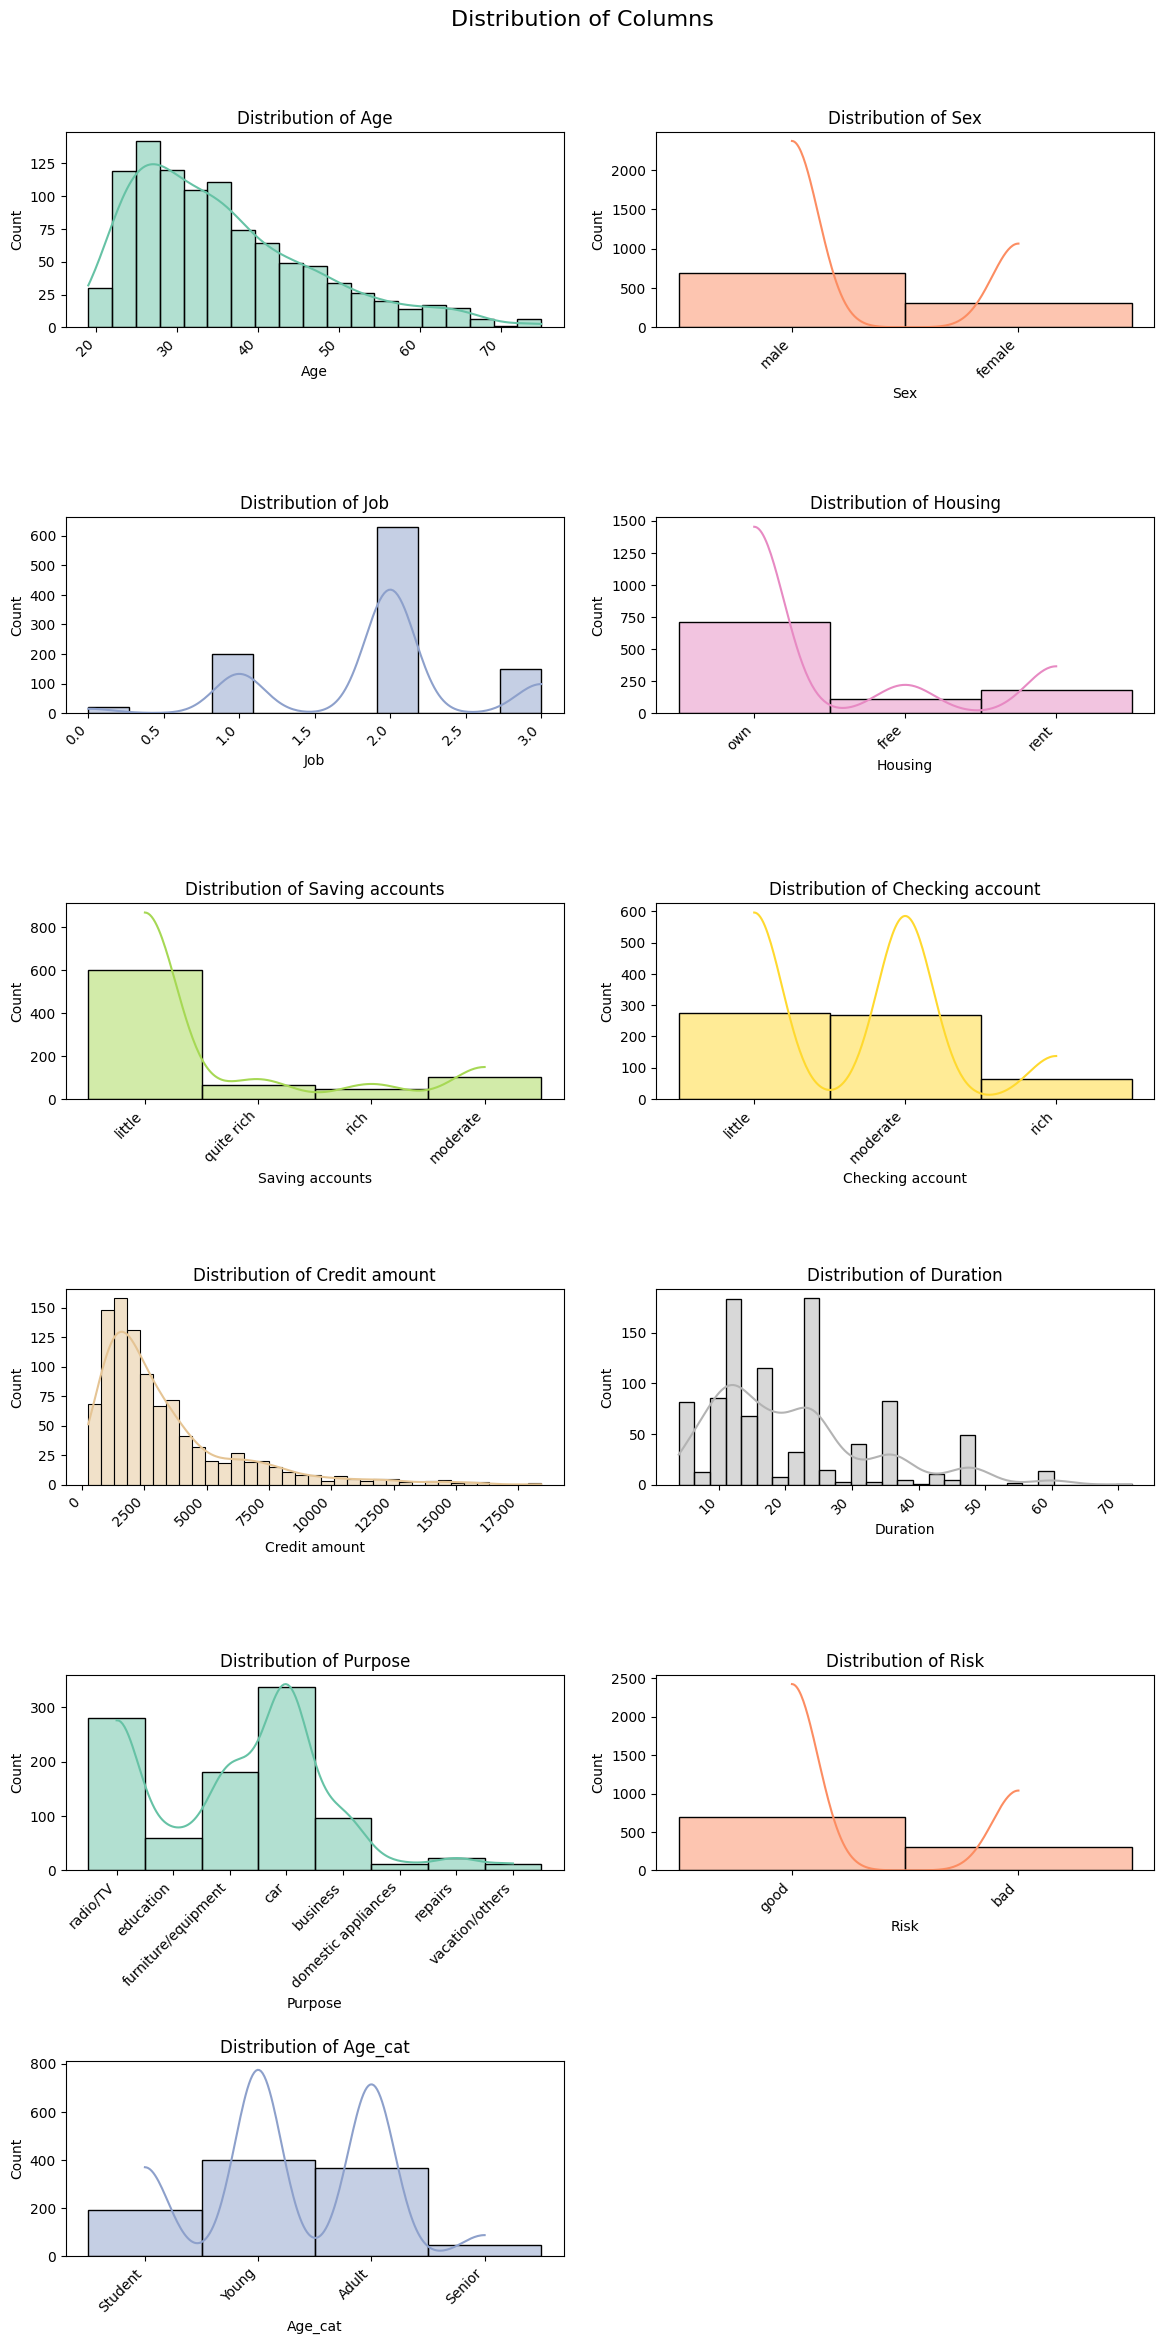

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example: Define a custom color palette (make sure it matches or exceeds the number of columns)
custom_palette = sns.color_palette("Set2", len(df.columns))

# Calculate the number of rows and columns for subplots
n_cols = 2
n_rows = int(np.ceil(len(df.columns) / n_cols))

# Create subplots dynamically based on the number of columns in df
fig, ax = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))

# Flatten the axes array to make indexing easier (in case there's more than 1 row)
ax = ax.flatten()

# Plot each column in the dataset
for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=ax[i], color=custom_palette[i % len(custom_palette)])
    ax[i].set_title(f'Distribution of {col}')
    
    # Rotate x-axis labels for readability
    for label in ax[i].get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')

# Remove any empty subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

# Set the overall title
fig.suptitle('Distribution of Columns', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout(pad=2, rect=[0, 0, 1, 0.97])
plt.show()


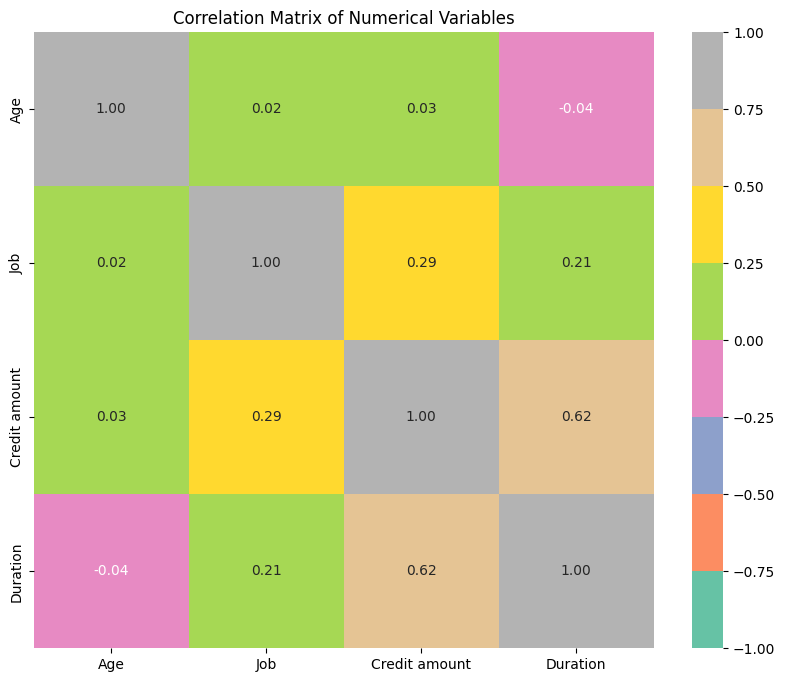

In [77]:
# Select numerical columns from the 'credit' DataFrame
numerical_credit = df.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numerical_credit.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Set2", fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


In [78]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Senior
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Student
2,49,male,1,own,little,NaN,2096,12,education,good,Adult
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Adult
4,53,male,2,free,little,little,4870,24,car,bad,Adult


In [79]:
from sklearn.preprocessing import LabelEncoder
for col in ["Sex", "Purpose", "Age_cat"]:
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,67,1,2,own,NaN,little,1169,6,5,good,1
1,22,0,2,own,little,moderate,5951,48,5,bad,2
2,49,1,1,own,little,NaN,2096,12,3,good,0
3,45,1,2,free,little,little,7882,42,4,good,0
4,53,1,2,free,little,little,4870,24,1,bad,0


In [80]:
# label encode account quality and fill NaN with 0
def H_LabelEncoder(text):
    if text == "free":
        return 0
    elif text == "rent":
        return 1
    elif text == "own":
        return 2

df["Housing"] = df["Housing"].apply(H_LabelEncoder)

In [81]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,67,1,2,2,NaN,little,1169,6,5,good,1
1,22,0,2,2,little,moderate,5951,48,5,bad,2
2,49,1,1,2,little,NaN,2096,12,3,good,0
3,45,1,2,0,little,little,7882,42,4,good,0
4,53,1,2,0,little,little,4870,24,1,bad,0


In [82]:
# label encode account quality and fill NaN with 0
def SC_LabelEncoder(text):
    if text == "little":
        return 1
    elif text == "moderate":
        return 2
    elif text == "quite rich":
        return 3
    elif text == "rich":
        return 4
    else:
        return 0

df["Saving accounts"] = df["Saving accounts"].apply(SC_LabelEncoder)
df["Checking account"] = df["Checking account"].apply(SC_LabelEncoder)

In [83]:
# use LabelEncoder() to encode other categorical columns:
from sklearn.preprocessing import LabelEncoder
for col in ["Sex", "Purpose", "Age"]:
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,48,1,2,2,0,1,1169,6,5,good,1
1,3,0,2,2,1,2,5951,48,5,bad,2
2,30,1,1,2,1,0,2096,12,3,good,0
3,26,1,2,0,1,1,7882,42,4,good,0
4,34,1,2,0,1,1,4870,24,1,bad,0


In [84]:
risk_mapping = {'bad': 0, 'good': 1}
if 'Risk' in df.columns:
    df['Risk'] = df['Risk'].map(risk_mapping)

In [85]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,48,1,2,2,0,1,1169,6,5,1,1
1,3,0,2,2,1,2,5951,48,5,0,2
2,30,1,1,2,1,0,2096,12,3,1,0
3,26,1,2,0,1,1,7882,42,4,1,0
4,34,1,2,0,1,1,4870,24,1,0,0


In [86]:
df.isnull().sum()


Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
Age_cat             0
dtype: int64

In [87]:
IQR = df['Credit amount'].quantile(0.75) - df['Credit amount'].quantile(0.25)
Lower_fence = df['Credit amount'].quantile(0.25) - (IQR*1.5)
Upper_fence = df['Credit amount'].quantile(0.75) + (IQR*1.5)

print('Credit amount outliers are values < {lowerbaundary} or {upperbaundary}'.format(lowerbaundary = Lower_fence, upperbaundary = Upper_fence))

Credit amount outliers are values < -2544.625 or 7882.375


In [88]:
df['Credit amount'] = np.where(df['Credit amount'] > Upper_fence, Upper_fence, df['Credit amount'])

Text(0.5, 1.0, 'Boxplot for Credit amount')

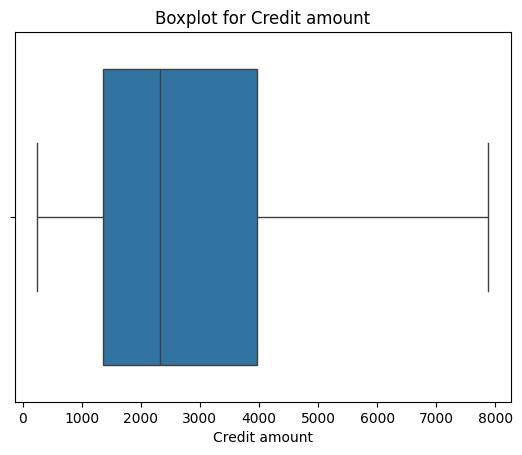

In [89]:
sns.boxplot(data = df, x = 'Credit amount')
plt.title('Boxplot for Credit amount')

<Axes: >

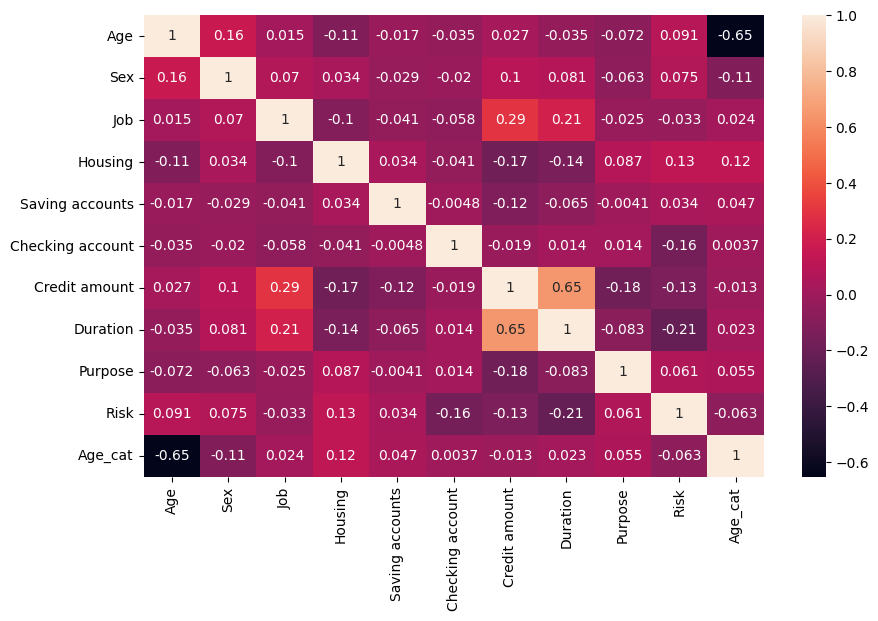

In [90]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True)

In [91]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,48,1,2,2,0,1,1169.0,6,5,1,1
1,3,0,2,2,1,2,5951.0,48,5,0,2
2,30,1,1,2,1,0,2096.0,12,3,1,0
3,26,1,2,0,1,1,7882.0,42,4,1,0
4,34,1,2,0,1,1,4870.0,24,1,0,0


In [92]:
# Split the data into X (features) and y (target)
X = df.drop(['Risk','Age'], axis=1)
y = df['Risk']

In [93]:
X

,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Age_cat
0,1,2,2,0,1,1169.0,6,5,1
1,0,2,2,1,2,5951.0,48,5,2
2,1,1,2,1,0,2096.0,12,3,0
3,1,2,0,1,1,7882.0,42,4,0
4,1,2,0,1,1,4870.0,24,1,0
...,...,...,...,...,...,...,...,...,...
995,0,1,2,1,0,1736.0,12,4,3
996,1,3,2,1,1,3857.0,30,1,0
997,1,2,2,1,0,804.0,12,5,0
998,1,2,0,1,1,1845.0,45,5,2


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 42)

In [95]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [96]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [97]:
log_reg = LogisticRegression(solver = 'liblinear', random_state = 42, penalty = "l1")

log_reg.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [98]:
coefficients = log_reg.coef_


features_name = df.columns.tolist()

In [99]:
features_importance = {}
for feat, coef in zip(features_name,coefficients[0]):
    features_importance[feat] = coef

In [100]:
features_importance

{'Age': 0.4629150194034183,
 'Sex': 0.3133475368395055,
 'Job': 0.6801761911387042,
 'Housing': 0.2518104582683629,
 'Saving accounts': -1.2654716102186794,
 'Checking account': 0.0,
 'Credit amount': -2.2999985359776582,
 'Duration': 0.28232874341918995,
 'Purpose': -0.37058217263392296}

In [102]:
sorted_features_importance = {k: v for k, v in sorted(features_importance.items(), key = lambda item: abs(item[1]), reverse = True )}

Text(0.5, 1.0, 'The importance of features accoridng to thier weight')

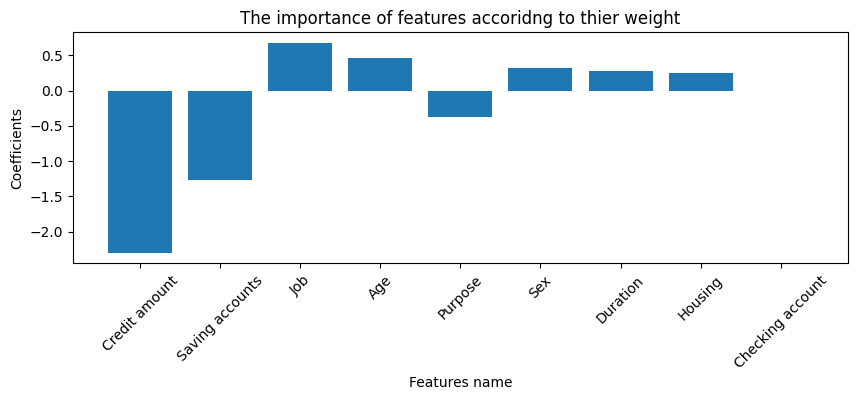

In [103]:
features_name = list(sorted_features_importance.keys())
coefficients = list(sorted_features_importance.values())
plt.figure(figsize = (10,3))
plt.bar(range(len(features_name)), coefficients, align = 'center')
plt.xticks(range(len(features_name)), features_name, rotation=45)
plt.xlabel('Features name')
plt.ylabel('Coefficients')
plt.title('The importance of features accoridng to thier weight')

In [104]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [105]:
X = sm.add_constant(X)

# Calculate VIF values
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

           Variable        VIF
0             const  26.530398
1               Sex   1.034277
2               Job   1.105992
3           Housing   1.063768
4   Saving accounts   1.017719
5  Checking account   1.007332
6     Credit amount   1.890868
7          Duration   1.736532
8           Purpose   1.044506
9           Age_cat   1.038143


In [106]:
predictions = log_reg.predict(X_test)
Predictions = pd.DataFrame({'Predicted values': predictions,
                           'Actual values':y_test})
Predictions

,Predicted values,Actual values
440,1,1
561,1,0
220,1,1
696,1,1
810,1,1
...,...,...
386,1,1
788,0,0
654,1,1
705,1,1


In [107]:
cm = confusion_matrix(y_test, predictions)
cm

array([[ 4, 26],
       [11, 59]], dtype=int64)

In [108]:
from sklearn.preprocessing import Binarizer
for i in range (1,8):
    cm1 = 0
    
    y_pred1 = log_reg.predict_proba(X_test)[:,1]
    y_pred1 = y_pred1.reshape(-1,1)
    binarizer = Binarizer(threshold = i/10)
    y_pred2 = binarizer.transform(y_pred1)
    y_pred2 = np.where(y_pred2 == 1, 1, 0)
    
    cm1 = confusion_matrix(y_test, y_pred2)
    
    print(f"With {i/10} threshold the Confusion matrix is : \n\n{cm1}\n\n"
         f"Accuracy score: {accuracy_score(y_test, y_pred2)}\n\n")

With 0.1 threshold the Confusion matrix is : 

[[ 0 30]
 [ 0 70]]

Accuracy score: 0.7


With 0.2 threshold the Confusion matrix is : 

[[ 0 30]
 [ 0 70]]

Accuracy score: 0.7


With 0.3 threshold the Confusion matrix is : 

[[ 0 30]
 [ 0 70]]

Accuracy score: 0.7


With 0.4 threshold the Confusion matrix is : 

[[ 2 28]
 [ 3 67]]

Accuracy score: 0.69


With 0.5 threshold the Confusion matrix is : 

[[ 4 26]
 [11 59]]

Accuracy score: 0.63


With 0.6 threshold the Confusion matrix is : 

[[ 9 21]
 [16 54]]

Accuracy score: 0.63


With 0.7 threshold the Confusion matrix is : 

[[18 12]
 [29 41]]

Accuracy score: 0.59




In [109]:
y_pred = log_reg.predict_proba(X_test)[:,1]
y_pred = y_pred.reshape(-1,1)

binarizer = Binarizer(threshold = 0.6)
correct_pred = binarizer.transform(y_pred)

In [110]:
probablities = log_reg.predict_proba(X_test)[:,1]
probablities = pd.DataFrame({'The probablity of being good custmer': probablities,
                           'Actual values':y_test})
probablities

,The probablity of being good custmer,Actual values
440,0.886514,1
561,0.667891,0
220,0.731989,1
696,0.751977,1
810,0.739393,1
...,...,...
386,0.689236,1
788,0.377841,0
654,0.763995,1
705,0.613473,1


In [111]:
selected_rows = probablities[(probablities['The probablity of being good custmer'] > 0.7) & (probablities['Actual values'] == 0)]

In [112]:
selected_rows

,The probablity of being good custmer,Actual values
588,0.797016,0
631,0.825327,0
368,0.719915,0
540,0.709432,0
474,0.712231,0
835,0.836827,0
80,0.765083,0
924,0.794117,0
627,0.752554,0
190,0.857938,0


In [113]:
probablities_values = log_reg.predict_proba(X_test)[:,1]

In [114]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss, roc_auc_score

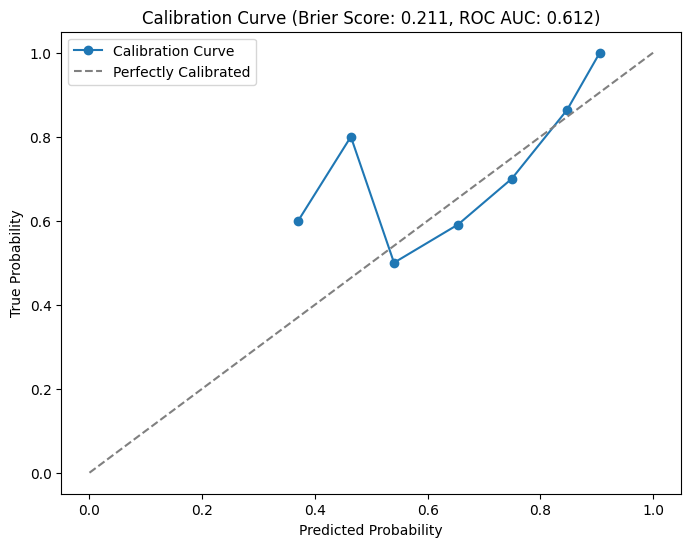

In [115]:
brier_score = brier_score_loss(y_test, probablities_values)

# Calculate the ROC AUC score (for reference)
roc_auc = roc_auc_score(y_test, probablities_values)

# Plot the calibration curve
prob_true, prob_pred = calibration_curve(y_test, probablities_values, n_bins=10, strategy='uniform')

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title(f'Calibration Curve (Brier Score: {brier_score:.3f}, ROC AUC: {roc_auc:.3f})')
plt.legend()
plt.show()